In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
class manejo_archivo: 
    def __init__(self) :
        self.mat_files = {}
        self.csv_files = {}
    def leer_mat(self, ruta_archivo, key=None):
        if key is None:
            key = ruta_archivo
        data = scipy.io.loadmat(ruta_archivo)
        self.mat_files[key] = data
    def leer_csv(self, ruta_archivo, key=None):
         if key is None:
            key = ruta_archivo
            data = pd.read_csv(ruta_archivo)
            self.csv_files[key] = data
        

    def obtener_datos(self,key):
        if key in self.mat_files:
            return self.mat_files[key]
        elif key in self.csv_files:
            return self.csv_files[key]
        else:
            return None
class Graficadora:
    def __init__(self, datos):
     
        self.datos = datos

    def plot_histograma(self, canal):
        plt.hist(self.datos[ :, canal], bins=50)
        plt.title(f'Histograma del Canal {canal}')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()


    def plot_desviacion_estandar(self, inicio, fin):
        segmento = self.datos[inicio : fin, :]
        desviaciones_estandar = np.std(segmento, axis=0)
        plt.plot(desviaciones_estandar)
        plt.title(f'Desviación Estándar de los Canales en el Segmento {inicio}-{fin}')
        plt.xlabel('Canal')
        plt.ylabel('Desviación Estándar')
        plt.grid(True)
        plt.show()

    def plot_senal_ruido(self, canal, vector_tiempo):
        ruido = np.random.normal(0, 1, len(vector_tiempo))
        senal_ruido = self.datos[0 : len(vector_tiempo), canal] + ruido
        plt.plot(vector_tiempo, senal_ruido)
        plt.title(f'Señal del Canal {canal} con Ruido Agregado')
        plt.xlabel('Tiempo (ms)')

class Estadistica:
    def __init__(self, datos_csv):
        self.df = datos_csv

    def mostrar_nombres_columnas(self):
        print("Nombres de las columnas:")
        print(self.df.columns)

    def graficar_histograma(self, columna):
        if columna not in self.df.columns:
            print(f"La columna '{columna}' no existe en el archivo CSV.")
            return
        if not np.issubdtype(self.df[columna].dtype, np.number):
            print(f"La columna '{columna}' no es numérica.")
            return
        plt.hist(self.df[columna])
        plt.title(f'Histograma de la Columna {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()

    def mostrar_estadisticos(self, columnas):
        if len(columnas) != 3:
            print("Debe seleccionar exactamente 3 columnas.")
            return
        for columna in columnas:
            if columna not in self.df.columns:
                print(f"La columna '{columna}' no existe en el archivo CSV.")
                return
            if not np.issubdtype(self.df[columna].dtype, np.number):
                print(f"La columna '{columna}' no es numérica.")
                return
        estadisticos = pd.DataFrame({
            'Columna': columnas,
            'Media': self.df[columnas].mean(),
            'Moda': self.df[columnas].mode().iloc[0],
            'Desviación Estándar': self.df[columnas].std()
        })
        print(estadisticos)

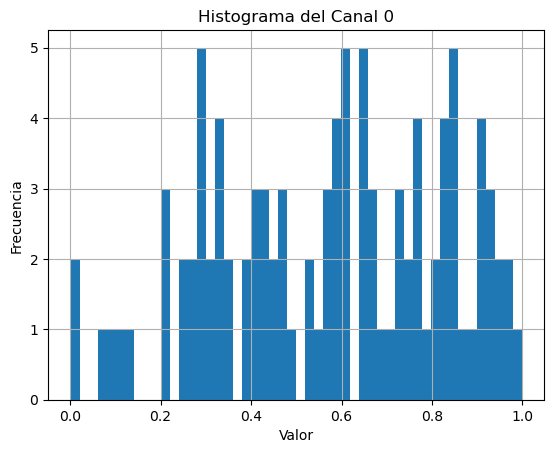

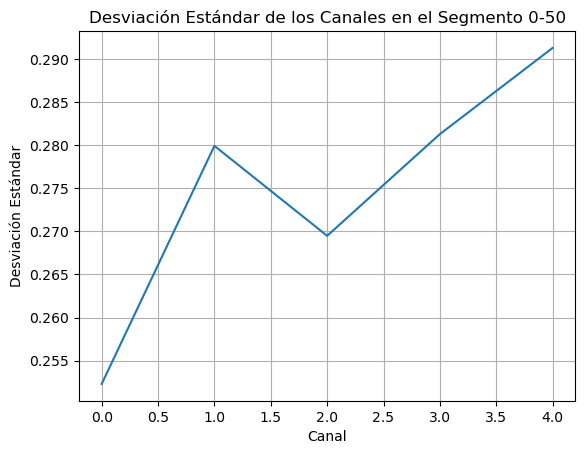

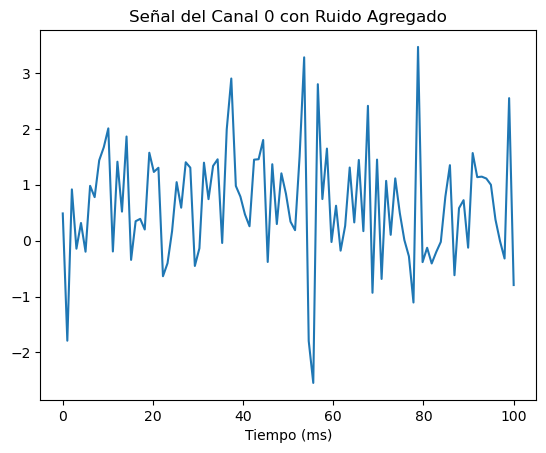

In [6]:
vector_tiempo = np.linspace(0, 100, 100)
datos = np.random.rand(100, 5)
g = Graficadora(datos)
g.plot_histograma(0)
g.plot_desviacion_estandar(0, 50)
vector_tiempo = np.linspace(0, 100, 100)
g.plot_senal_ruido(0, vector_tiempo)

ValueError: x and y can be no greater than 2D, but have shapes (1, 100, 5) and (1, 100)

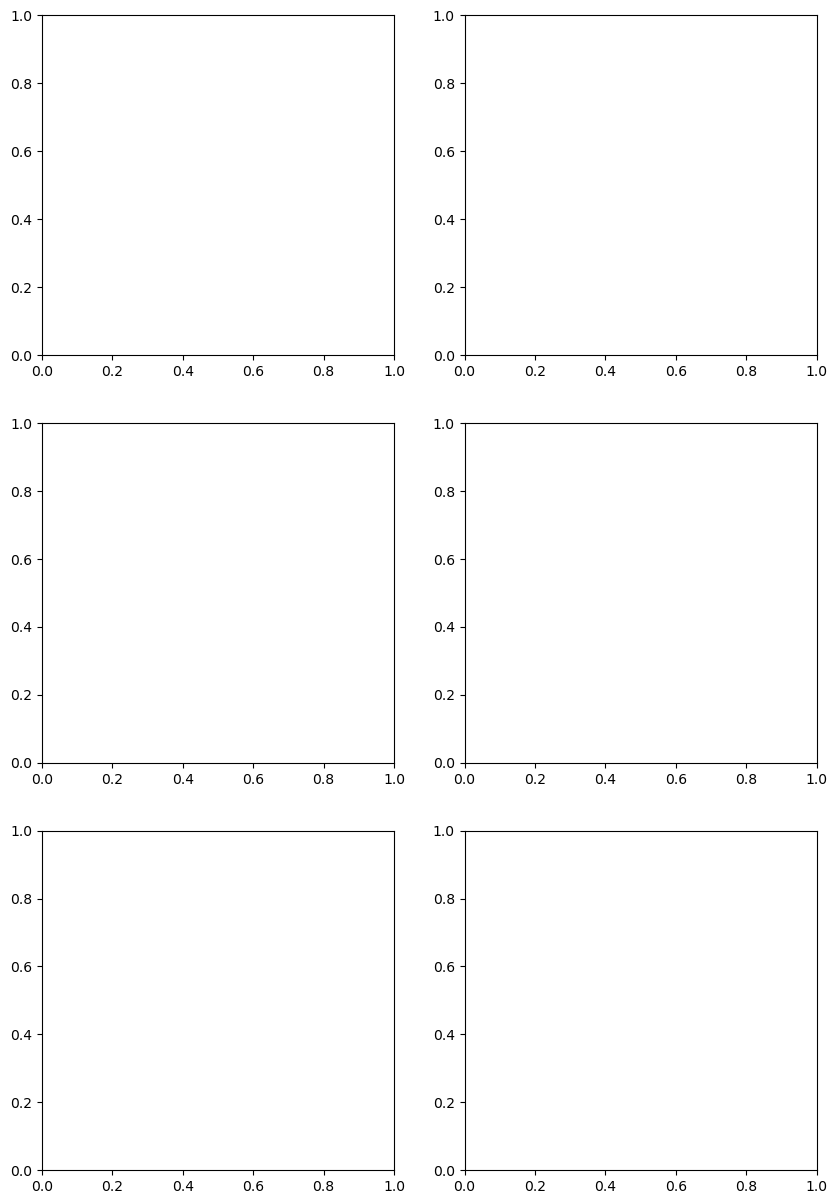

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
axs[0, 0].plot([datos], [vector_tiempo])
axs[0, 0].set_title('Fila 1, Columna 1')

axs[0, 1].plot([1, 2, 3], [4, 5, 6])
axs[0, 1].set_title('Fila 1, Columna 2')

axs[1, 0].plot([1, 2, 3], [4, 5, 6])
axs[1, 0].set_title('Fila 2, Columna 1')

axs[1, 1].plot([1, 2, 3], [4, 5, 6])
axs[1, 1].set_title('Fila 2, Columna 2')

axs[2, 0].plot([1, 2, 3], [4, 5, 6])
axs[2, 0].set_title('Fila 3, Columna 1')

axs[2, 1].plot([1, 2, 3], [4, 5, 6])
axs[2, 1].set_title('Fila 3, Columna 2')